# PyZahni

### Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
from skimage import io

In [3]:
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path.append(src_dir)

In [4]:
from kaudruck import KauDruck, plot_aoi, plot_aoi_pixelwise

## Load sample images

In [5]:
patients = ['Kaergel Madlen', 'Wollschon_Jerry', 'Schuch Maria']

In [6]:
filenames = {}
data_path = os.path.join(os.pardir, 'data')
file_extensions = ["*.PNG","*.png"]
file_list =[]
for patient in patients:
    for file_type in file_extensions:
        patient_path = os.path.join(data_path, patient, file_type)
        file_list.extend(glob.glob(patient_path))

from collections import ChainMap
filenames = dict(ChainMap(*[{e:x} for e, x in enumerate(file_list)]))
filenames

{0: '../data/Kaergel Madlen/Madlen_Kaergel_III_260208_800dpi.PNG',
 1: '../data/Kaergel Madlen/Madlen_Kaergel_260208_800dpi.PNG',
 2: '../data/Kaergel Madlen/Madlen_Kaergel_II_260208_800dpi.PNG',
 3: '../data/Kaergel Madlen/Madlen_Kaergel_I_260208_800dpi.PNG',
 4: '../data/Wollschon_Jerry/Jerry_Wollschon_I_011007_800dpi.PNG',
 5: '../data/Wollschon_Jerry/Jerry_Wollschon_011007_800dpi.PNG',
 6: '../data/Wollschon_Jerry/Jerry_Wollschon_II_011007_800dpi.PNG',
 7: '../data/Wollschon_Jerry/Jerry_Wollschon_III_011007_800dpi.PNG',
 8: '../data/Schuch Maria/Maria_Schuch_301007_800dpi.PNG',
 9: '../data/Schuch Maria/Maria_Schuch_I_301007_800dpi.PNG',
 10: '../data/Schuch Maria/Maria_Schuch_II_301007_800dpi.PNG',
 11: '../data/Schuch Maria/Maria_Schuch_III_301007_800dpi.PNG'}

## Select image by using its key
> __e.g. 1, 2, ... n__



In [7]:
key = 3

## Plot the image

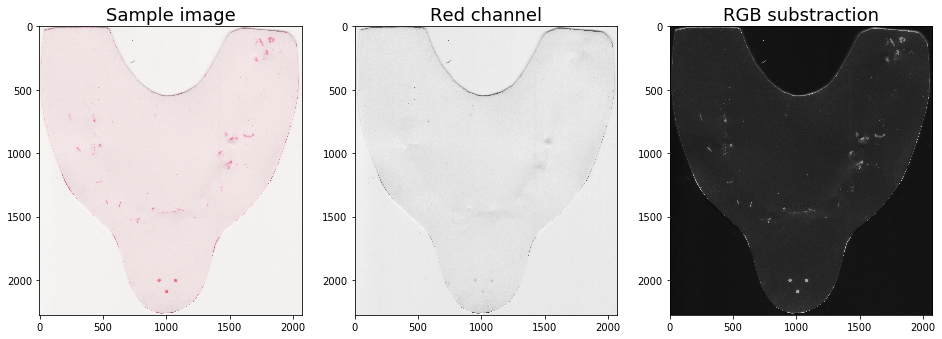

In [8]:
img = io.imread(filenames[key])
fig, ax = plt.subplots(ncols=3, figsize=(16,8))
ax[0].imshow(img)
ax[0].set_title('Sample image', size=18)
ax[1].imshow(img[:,:,0], cmap=cmap.gray)
ax[1].set_title('Red channel', size=18)
ax[2].imshow(((1-img[:,:,1]/255) + (1-img[:,:,2]/255))/2 , cmap=cmap.gray)
ax[2].set_title('RGB substraction', size=18);

## Load image and set parameters

In [9]:
kd = KauDruck(image_path=filenames[key])
kd.set_schwelle(0.30)

## Compute results

In [10]:
kd.compute_force_pixelwise()

## Plot results

/Users/jokr/miniconda3/envs/kaudruck/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


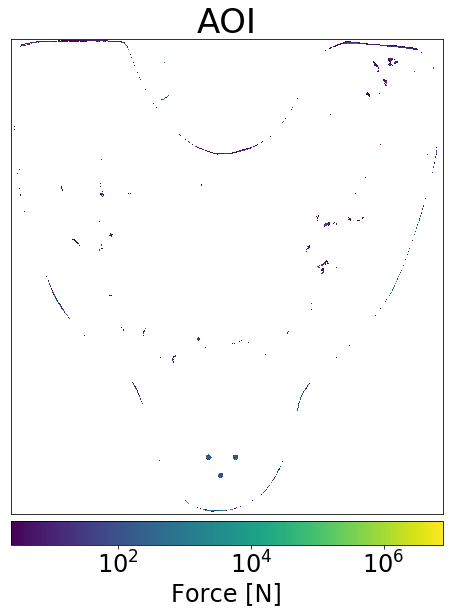

In [11]:
plot_aoi_pixelwise(kd)

> __Note: It is a non trivial issue to restrict the AOI to the area of bite contact.__ 

## Run analysis on subset

In [12]:
kd = KauDruck(image_path=filenames[key])

# HERE you set the area of interest (AOI)
x_aoi = 1350
y_aoi = 815
height_aoi = 350
width_aoi = 400

# HERE you set the threshold (default = 0.3)
kd.set_schwelle(0.3)

# HERE you set a limit to exluclude outlier 
# needs to be determnined why outliner occour in the forst place
kd.set_maximum_force(1000)

### Check AOI

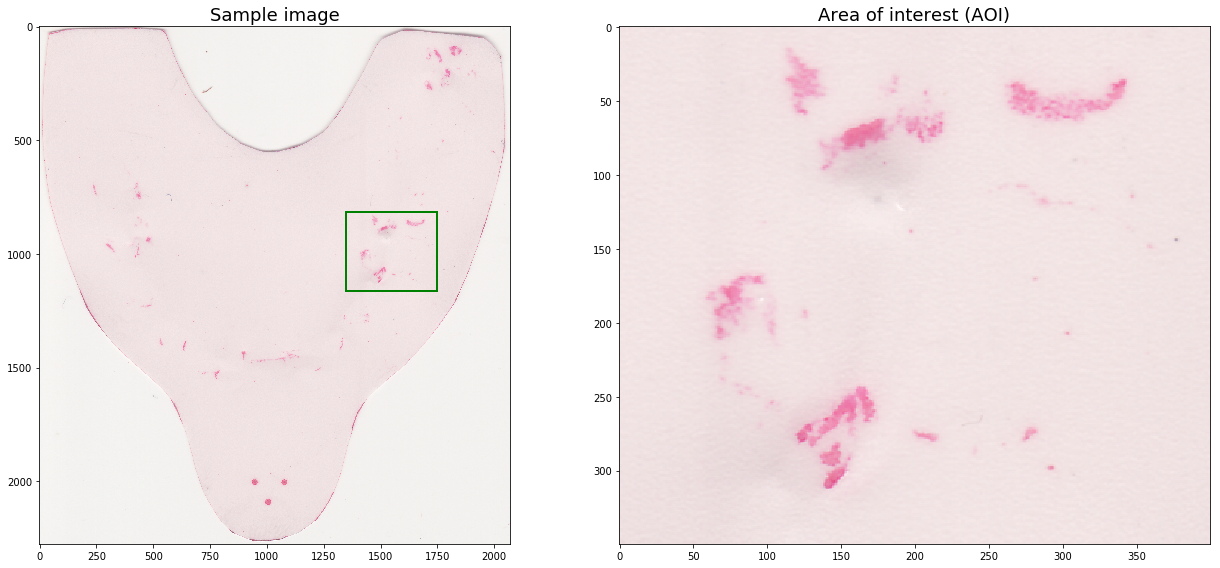

In [13]:
kd.set_aoi(xy = (x_aoi, y_aoi), height=height_aoi, width=width_aoi) 
plot_aoi(kd)

### Plot results

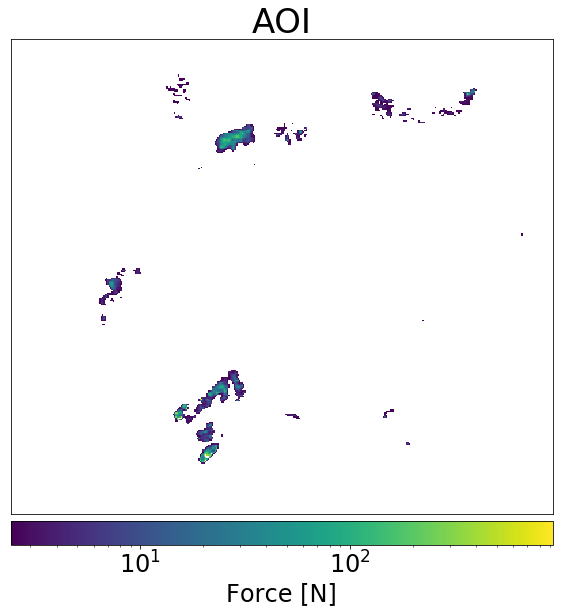

In [14]:
kd.compute_force_pixelwise()
plot_aoi_pixelwise(kd)

### Results summary

In [15]:
kd.pixelwise_report()

Summary
------------------------------
Maximum (N):        926.99
Minimum (N):        2.42
Mean (N):           19.4
Median (N):         4.45
Area_mm2:           1.93
Pressure (MPa):     10.04


***